In [75]:
import pandas as pd
#to load clean data
import numpy as np 
#for mathématic things
import matplotlib.pyplot as plt
#ETL
#EDA
#Campaign Analytics (ROI)
#RFM Segmentation (big professional step)
RFM Segmentation
#CLV analysis
#Customer 360 profile
#Campaign ROI
#ustomer & transaction analyses
#Full marketing data science workflow

In [74]:
customers = pd.read_csv("customers.csv")
transactions = pd.read_csv("transactions.csv")
campaigns = pd.read_csv("campaigns.csv")
website_logs = pd.read_csv("website_logs.csv")


In [5]:
customers.head()


,customer_id,age,gender,region,signup_date,source
0,1,52,Female,South,2023-03-05,TikTok
1,2,22,Female,East,2023-05-15,Facebook
2,3,35,Female,East,2023-01-05,Google
3,4,37,Female,East,2023-02-22,Instagram
4,5,19,Male,East,2023-01-28,Google


In [6]:
transactions.head()

,transaction_id,customer_id,date,amount,product_category,campaign_id
0,1,489,2024-12-08,246.44,Fashion,6.0
1,2,409,2024-04-22,134.24,Fashion,6.0
2,3,471,2024-04-25,271.31,Fitness,15.0
3,4,193,2024-05-18,291.44,Fitness,6.0
4,5,351,2024-03-16,182.80,Home,2.0


In [10]:
#corriger data
customers["signup_date"] = pd.to_datetime(customers["signup_date"])
customers.head()


,customer_id,age,gender,region,signup_date,source
0,1,52,Female,South,2023-03-05,TikTok
1,2,22,Female,East,2023-05-15,Facebook
2,3,35,Female,East,2023-01-05,Google
3,4,37,Female,East,2023-02-22,Instagram
4,5,19,Male,East,2023-01-28,Google


In [13]:
transactions["date"]= pd.to_datetime(transactions["date"])
transactions.head()

,transaction_id,customer_id,date,amount,product_category,campaign_id
0,1,489,2024-12-08,246.44,Fashion,6.0
1,2,409,2024-04-22,134.24,Fashion,6.0
2,3,471,2024-04-25,271.31,Fitness,15.0
3,4,193,2024-05-18,291.44,Fitness,6.0
4,5,351,2024-03-16,182.80,Home,2.0


In [14]:
campaigns.head()

,campaign_id,channel,budget,start_date,end_date
0,1,TikTok,5009,2024-05-12,2024-06-14
1,2,Facebook Ads,2424,2024-06-09,2024-06-29
2,3,Email,5984,2024-04-02,2024-05-20
3,4,Google Ads,2044,2024-03-11,2024-04-12
4,5,TikTok,12652,2024-04-29,2024-05-20


In [17]:
campaigns["start_date"] =pd.to_datetime(campaigns["start_date"])
campaigns.head()

,campaign_id,channel,budget,start_date,end_date
0,1,TikTok,5009,2024-05-12,2024-06-14
1,2,Facebook Ads,2424,2024-06-09,2024-06-29
2,3,Email,5984,2024-04-02,2024-05-20
3,4,Google Ads,2044,2024-03-11,2024-04-12
4,5,TikTok,12652,2024-04-29,2024-05-20


In [18]:
campaigns["end_date"] =pd.to_datetime(campaigns["end_date"])


In [19]:
website_logs["timestamp"] = pd.to_datetime(website_logs["timestamp"])


In [20]:
for df in [customers, transactions, campaigns, website_logs]:
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].astype('category')

In [24]:
#les coln manq
campaigns.isna().sum()


campaign_id    0
channel        0
budget         0
start_date     0
end_date       0
dtype: int64

In [26]:
customers.isna().sum()

customer_id    0
age            0
gender         0
region         0
signup_date    0
source         0
dtype: int64

In [27]:
transactions.isna().sum()

transaction_id        0
customer_id           0
date                  0
amount                0
product_category      0
campaign_id         141
dtype: int64

In [28]:
website_logs.isna().sum()

timestamp           0
customer_id         0
page                0
session_duration    0
device              0
dtype: int64

In [31]:
customer_spending = transactions.groupby("customer_id")["amount"].sum().reset_index(name="total_spent")
customer_spending.head()

,customer_id,total_spent
0,1,2550.95
1,2,596.43
2,3,583.87
3,4,747.03
4,5,580.76


In [33]:
transactions.head()

,transaction_id,customer_id,date,amount,product_category,campaign_id
0,1,489,2024-12-08,246.44,Fashion,6.0
1,2,409,2024-04-22,134.24,Fashion,6.0
2,3,471,2024-04-25,271.31,Fitness,15.0
3,4,193,2024-05-18,291.44,Fitness,6.0
4,5,351,2024-03-16,182.80,Home,2.0


In [35]:
customer_orders = transactions.groupby("customer_id")["transaction_id"].count().reset_index(name="total_orders")
customer_orders.head()
#On compte combien de commandes chaque client a fait.

,customer_id,total_orders
0,1,13
1,2,4
2,3,6
3,4,6
4,5,6


In [37]:
customer_aov = customer_spending.merge(customer_orders)
customer_aov["AOV"] = customer_aov["total_spent"] / customer_aov["total_orders"]
customer_aov.head()
#Panier moyen


,customer_id,total_spent,total_orders,AOV
0,1,2550.95,13,196.226923
1,2,596.43,4,149.107500
2,3,583.87,6,97.311667
3,4,747.03,6,124.505000
4,5,580.76,6,96.793333


In [38]:
#Créer des indicateurs de navigation
#combien de fois le client a visité le site.
#total_sessions
sessions = website_logs.groupby("customer_id")["session_duration"].count().reset_index(name="total_sessions")
sessions.head()

,customer_id,total_sessions
0,1,7
1,2,7
2,3,9
3,4,10
4,5,5


In [40]:
#avg des sessions
avg_session = website_logs.groupby("customer_id")["session_duration"].mean().reset_index(name="avg_session_duration")
avg_session.head()

,customer_id,avg_session_duration
0,1,183.228571
1,2,165.142857
2,3,157.088889
3,4,150.780000
4,5,95.260000


In [45]:
#  Fusionner toutes les informations clients
customer_features = (
    customers
    .merge(customer_spending, on="customer_id", how="left")
    .merge(customer_orders, on="customer_id", how="left")
    .merge(customer_aov[["customer_id", "AOV"]], on="customer_id", how="left")
    .merge(sessions, on="customer_id", how="left")
    .merge(avg_session, on="customer_id", how="left")
)

#  Colonnes numériques → remplacer NaN par 0
num_cols = customer_features.select_dtypes(include=['float64', 'int64']).columns
customer_features[num_cols] = customer_features[num_cols].fillna(0)

# Colonnes catégorielles → remplacer NaN par "Unknown"
cat_cols = customer_features.select_dtypes(include=['object']).columns
for col in cat_cols:
    customer_features[col] = customer_features[col].astype('category')
    customer_features[col] = customer_features[col].cat.add_categories("Unknown").fillna("Unknown")

# Vérifier
customer_features.isna().sum()
customer_features.head()
#Les colonnes numériques → 0 si vide

#Les colonnes catégorielles → "Unknown" si vide

#Conversion .astype('category') obligatoire avant d’utiliser .cat.add_categories


,customer_id,age,gender,region,signup_date,source,total_spent,total_orders,AOV,total_sessions,avg_session_duration
0,1,52,Female,South,2023-03-05,TikTok,2550.95,13.0,196.226923,7,183.228571
1,2,22,Female,East,2023-05-15,Facebook,596.43,4.0,149.107500,7,165.142857
2,3,35,Female,East,2023-01-05,Google,583.87,6.0,97.311667,9,157.088889
3,4,37,Female,East,2023-02-22,Instagram,747.03,6.0,124.505000,10,150.780000
4,5,19,Male,East,2023-01-28,Google,580.76,6.0,96.793333,5,95.260000


Exploratory Data Analysis

In [46]:
customer_features.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   customer_id           500 non-null    int64         
 1   age                   500 non-null    int64         
 2   gender                500 non-null    category      
 3   region                500 non-null    category      
 4   signup_date           500 non-null    datetime64[ns]
 5   source                500 non-null    category      
 6   total_spent           500 non-null    float64       
 7   total_orders          500 non-null    float64       
 8   AOV                   500 non-null    float64       
 9   total_sessions        500 non-null    int64         
 10  avg_session_duration  500 non-null    float64       
dtypes: category(3), datetime64[ns](1), float64(4), int64(3)
memory usage: 33.4 KB


In [48]:
customer_features.describe()

,customer_id,age,signup_date,total_spent,total_orders,AOV,total_sessions,avg_session_duration
count,500.000000,500.000000,500,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,41.192000,2023-06-30 06:23:02.400000256,936.366040,6.000000,155.256580,8.000000,150.705710
min,1.000000,18.000000,2023-01-03 00:00:00,0.000000,0.000000,0.000000,1.000000,6.500000
25%,125.750000,30.000000,2023-04-01 00:00:00,584.510000,4.000000,132.337083,6.000000,127.951709
50%,250.500000,42.000000,2023-06-29 12:00:00,895.110000,6.000000,157.620167,8.000000,151.091667
75%,375.250000,53.000000,2023-10-05 18:00:00,1209.060000,7.000000,179.667500,10.000000,171.182292
max,500.000000,64.000000,2023-12-31 00:00:00,2994.960000,18.000000,290.610000,17.000000,274.250000
std,144.481833,13.540377,NaN,443.867059,2.502904,37.961681,2.921141,33.624912


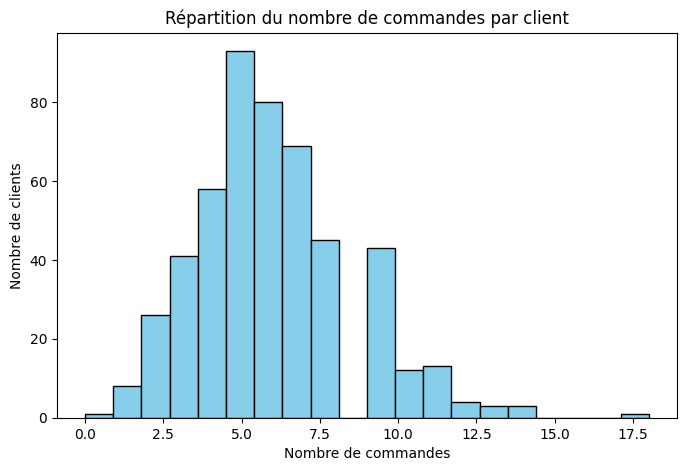

In [49]:
plt.figure(figsize=(8,5))
plt.hist(customer_features['total_orders'], bins=20, color='skyblue', edgecolor='black')
plt.title('Répartition du nombre de commandes par client')
plt.xlabel('Nombre de commandes')
plt.ylabel('Nombre de clients')
plt.show()


In [50]:
#Montre combien de clients passent peu ou beaucoup de commandes.

#Utile pour voir si la majorité des clients sont actifs ou inactifs.

Distribution du montant dépensé

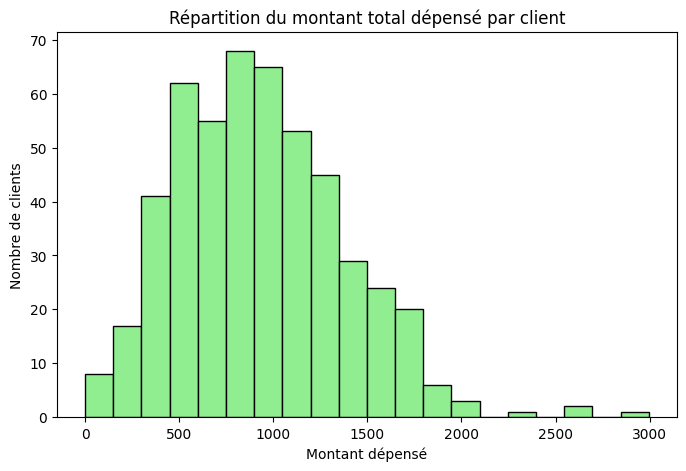

In [51]:
plt.figure(figsize=(8,5))
plt.hist(customer_features['total_spent'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Répartition du montant total dépensé par client')
plt.xlabel('Montant dépensé')
plt.ylabel('Nombre de clients')
plt.show()
#Permet d’identifier les gros acheteurs vs clients à faible dépense.

Panier moyen (AOV) vs nombre de commandes

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(customer_features['total_orders'], customer_features['AOV'], alpha=0.6)
plt.title('Panier moyen vs nombre de commandes')
plt.xlabel('Nombre de commandes')
plt.ylabel('Panier moyen (AOV)')
plt.show()
#Montre si les clients qui achètent plus ont tendance à avoir un panier moyen plus élevé ou plus faible.


Engagement sur le site

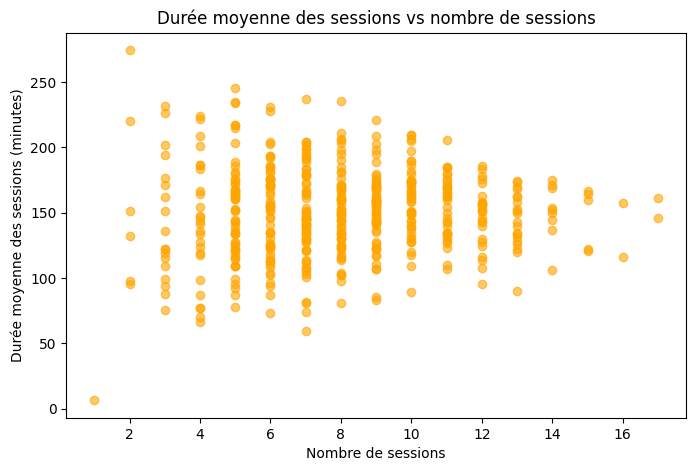

In [53]:
plt.figure(figsize=(8,5))
plt.scatter(customer_features['total_sessions'], customer_features['avg_session_duration'], alpha=0.6, color='orange')
plt.title('Durée moyenne des sessions vs nombre de sessions')
plt.xlabel('Nombre de sessions')
plt.ylabel('Durée moyenne des sessions (minutes)')
plt.show()
#Les clients qui visitent souvent le site passent-ils plus de temps par session ?

#Utile pour le marketing digital.

Performance des campagnes (ROI)

In [58]:
transactions.columns


Index(['transaction_id', 'customer_id', 'date', 'amount', 'product_category',
       'campaign_id'],
      dtype='object')

In [61]:
# 1. Calcul du CA généré par chaque campagne
campaign_sales = transactions.groupby("campaign_id").agg({
    "amount": "sum",            # total des ventes
    "transaction_id": "count"   # nombre de transactions
}).reset_index()

campaign_sales.rename(columns={
    "amount": "sales_generated",
    "transaction_id": "num_transactions"
}, inplace=True)

# 2. Ajouter les infos des campagnes (dont le budget)
campaign_sales = campaign_sales.merge(campaigns, on="campaign_id", how="left")

# 3. Calcul du ROI = (sales - budget) / budget
campaign_sales["ROI"] = (campaign_sales["sales_generated"] - campaign_sales["budget"]) / campaign_sales["budget"]

# 4. Afficher le tableau final
campaign_sales


,campaign_id,sales_generated,num_transactions,channel,budget,start_date,end_date,ROI
0,1.0,17133.69,121,TikTok,5009,2024-05-12,2024-06-14,2.420581
1,2.0,21485.98,130,Facebook Ads,2424,2024-06-09,2024-06-29,7.863853
2,3.0,22168.02,152,Email,5984,2024-04-02,2024-05-20,2.704549
3,4.0,28737.06,183,Google Ads,2044,2024-03-11,2024-04-12,13.059227
4,5.0,20762.83,133,TikTok,12652,2024-04-29,2024-05-20,0.641071
5,6.0,22605.88,147,Google Ads,4620,2024-06-21,2024-07-20,3.893048
6,7.0,21552.54,135,TikTok,4408,2024-08-26,2024-09-12,3.889415
7,8.0,24789.95,154,Email,13951,2024-09-23,2024-10-17,0.776930
8,9.0,25856.73,153,Facebook Ads,6174,2024-04-04,2024-04-30,3.188003
9,10.0,17474.48,123,TikTok,3196,2024-01-19,2024-03-03,4.467610


In [60]:
campaigns.columns


Index(['campaign_id', 'channel', 'budget', 'start_date', 'end_date'], dtype='object')

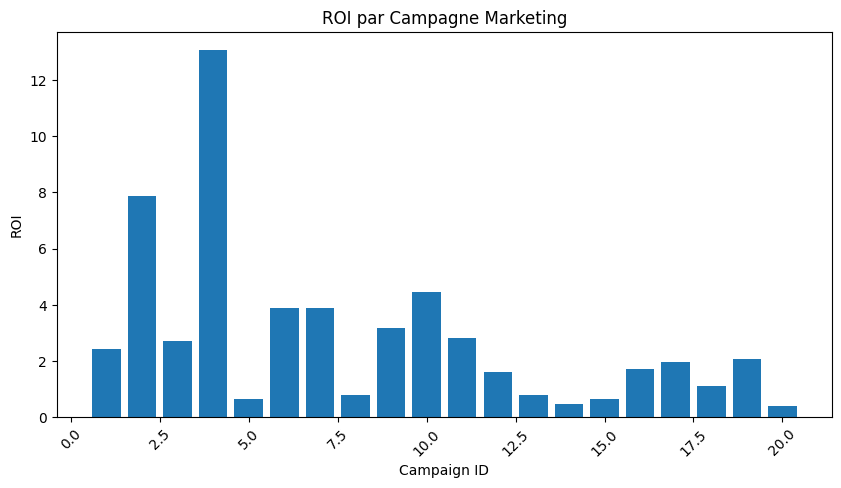

In [62]:
plt.figure(figsize=(10,5))
plt.bar(campaign_sales['campaign_id'], campaign_sales['ROI'])
plt.xticks(rotation=45)
plt.title('ROI par Campagne Marketing')
plt.xlabel('Campaign ID')
plt.ylabel('ROI')
plt.show()


Customer Segmentation (RFM Analysis)

RFM = Recency, Frequency, Monetary
For each customer we calculate:

Recency → how long since last purchase

Frequency → number of purchases

Monetary → total amount spent

This gives business-ready segments in your dashboard like:

VIP customers

Loyal

At risk

About to churn

New customers

Low value

In [63]:
import datetime as dt

In [66]:
transactions["date"] = pd.to_datetime(transactions["date"])
reference_date = transactions["date"].max() + pd.Timedelta(days=1)
rfm = transactions.groupby("customer_id").agg({
    "date": lambda x: (reference_date - x.max()).days,  # Recency
    "transaction_id": "count",                          # Frequency
    "amount": "sum"                                     # Monetary
}).reset_index()

rfm.columns = ["customer_id", "Recency", "Frequency", "Monetary"]

rfm.head()



,customer_id,Recency,Frequency,Monetary
0,1,59,13,2550.95
1,2,85,4,596.43
2,3,8,6,583.87
3,4,3,6,747.03
4,5,25,6,580.76


Add RFM Scores

In [69]:
# Recency score (lower recency = better)
rfm["R_score"] = pd.qcut(rfm["Recency"], 5, labels=[5,4,3,2,1])

# Frequency score (higher frequency = better)
rfm["F_score"] = pd.qcut(rfm["Frequency"].rank(method="first"), 5, labels=[1,2,3,4,5])

# Monetary score (higher spending = better)
rfm["M_score"] = pd.qcut(rfm["Monetary"], 5, labels=[1,2,3,4,5])


Create a Customer Segment

In [70]:
rfm["RFM_Score"] = (
    rfm["R_score"].astype(str) +
    rfm["F_score"].astype(str) +
    rfm["M_score"].astype(str)
)


In [71]:
def segment_customer(row):
    if row["RFM_Score"] >= "444":
        return "VIP"
    elif row["R_score"] == "5":
        return "Loyal"
    elif row["R_score"] == "1":
        return "At Risk"
    else:
        return "Regular"

rfm["Segment"] = rfm.apply(segment_customer, axis=1)

rfm.head()


,customer_id,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,Segment
0,1,59,13,2550.95,2,5,5,255,Regular
1,2,85,4,596.43,2,1,2,212,Regular
2,3,8,6,583.87,5,3,2,532,VIP
3,4,3,6,747.03,5,3,2,532,VIP
4,5,25,6,580.76,4,3,2,432,Regular


Visualize Segments

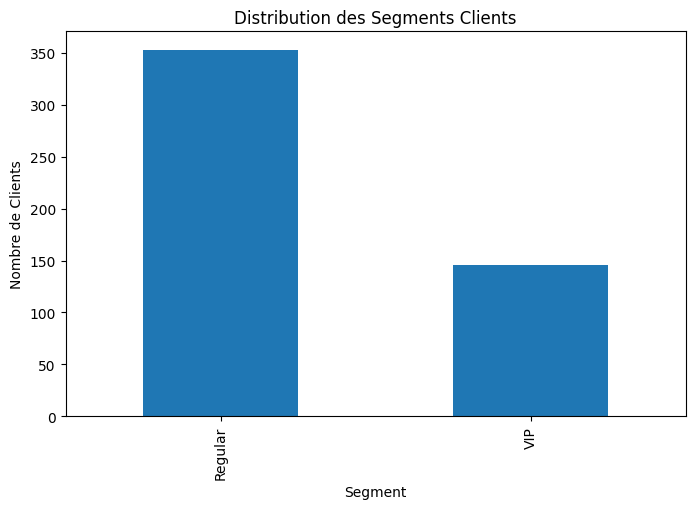

In [72]:
rfm["Segment"].value_counts().plot(kind="bar", figsize=(8,5))
plt.title("Distribution des Segments Clients")
plt.xlabel("Segment")
plt.ylabel("Nombre de Clients")
plt.show()


Customer Lifetime Value (CLV) Analysis
Companies use CLV to:

Know who is most important

Improve retention

Target campaigns

Detect high-value customers

We will calculate a simple but powerful CLV, based on historical behavior

In [76]:
# Total revenue per customer
total_revenue = transactions.groupby("customer_id")["amount"].sum()

# Average order value per customer
avg_order_value = transactions.groupby("customer_id")["amount"].mean()

# Purchase frequency: number of transactions / number of unique customers
purchase_frequency = (
    transactions.groupby("customer_id")["transaction_id"].count() / 
    len(transactions["customer_id"].unique())
)

# Combine into a CLV dataframe
clv = pd.DataFrame({
    "total_revenue": total_revenue,
    "avg_order_value": avg_order_value,
    "purchase_frequency": purchase_frequency
}).reset_index()

clv.head()


,customer_id,total_revenue,avg_order_value,purchase_frequency
0,1,2550.95,196.226923,0.026052
1,2,596.43,149.107500,0.008016
2,3,583.87,97.311667,0.012024
3,4,747.03,124.505000,0.012024
4,5,580.76,96.793333,0.012024


Calculate CLV CLV = Average Order Value × Purchase Frequency × 12 months

In [79]:
clv["CLV"] = clv["avg_order_value"] * clv["purchase_frequency"] * 12
clv.head()


,customer_id,total_revenue,avg_order_value,purchase_frequency,CLV
0,1,2550.95,196.226923,0.026052,61.345491
1,2,596.43,149.107500,0.008016,14.343006
2,3,583.87,97.311667,0.012024,14.040962
3,4,747.03,124.505000,0.012024,17.964649
4,5,580.76,96.793333,0.012024,13.966172


Merge CLV with RFM

In [78]:
customer_360 = rfm.merge(clv[["customer_id", "CLV"]], on="customer_id", how="left")
customer_360.head()


,customer_id,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,Segment,CLV
0,1,59,13,2550.95,2,5,5,255,Regular,61.345491
1,2,85,4,596.43,2,1,2,212,Regular,14.343006
2,3,8,6,583.87,5,3,2,532,VIP,14.040962
3,4,3,6,747.03,5,3,2,532,VIP,17.964649
4,5,25,6,580.76,4,3,2,432,Regular,13.966172


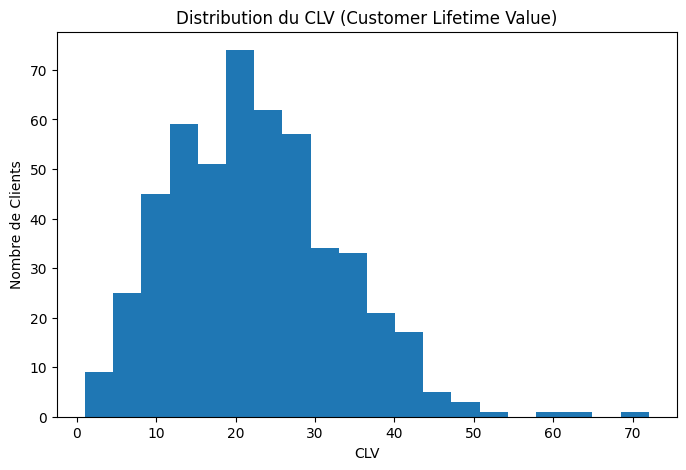

In [80]:
plt.figure(figsize=(8,5))
plt.hist(customer_360["CLV"], bins=20)
plt.title("Distribution du CLV (Customer Lifetime Value)")
plt.xlabel("CLV")
plt.ylabel("Nombre de Clients")
plt.show()


In [81]:
# Export Campaign Sales for Power BI
campaign_sales.to_csv("campaign_sales.csv", index=False)
print("campaign_sales.csv exported successfully!")

# Export Customer 360 for Power BI
customer_360.to_csv("customer_360.csv", index=False)
print("customer_360.csv exported successfully!")


campaign_sales.csv exported successfully!
customer_360.csv exported successfully!


In [82]:
# Export Customer 360 for Power BI
customer_360.to_csv("customer_360.csv", index=False)
print("customer_360.csv exported successfully!")

customer_360.csv exported successfully!
